In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('card_transdata.csv')

In [3]:
df.isna().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                   False
used_chip                         False
used_pin_number                   False
online_order                      False
fraud                             False
dtype: bool

In [4]:
X = df.drop(['fraud'], axis = 1)
X.shape

(1000000, 7)

In [5]:
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


In [6]:
for kolona in X.columns:
    print(kolona)

distance_from_home
distance_from_last_transaction
ratio_to_median_purchase_price
repeat_retailer
used_chip
used_pin_number
online_order


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [8]:
X.columns[:3]

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price'],
      dtype='object')

In [9]:
scaler = MinMaxScaler()

In [10]:
X_novo = scaler.fit_transform(X)

In [11]:
X_novo = pd.DataFrame(X_novo)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_novo)

In [14]:
pca.explained_variance_

array([0.22762876, 0.22732604])

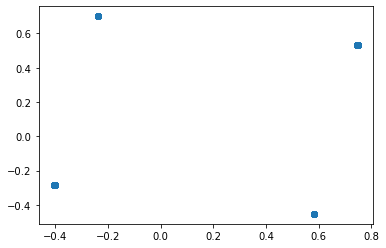

In [15]:
scatter = plt.scatter(X_pca[:,0], X_pca[:,1])

plt.show()


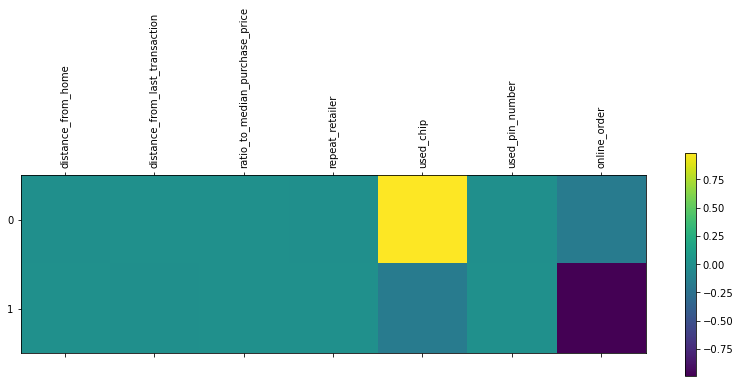

In [16]:
names = [i for i in range(pca.n_components_)]

plt.matshow(pca.components_)
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=names)
plt.colorbar()

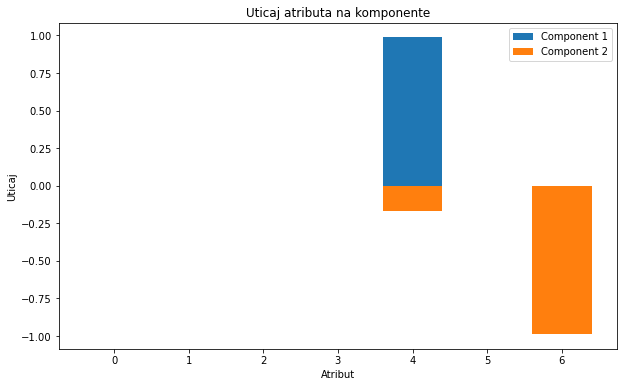

In [17]:
# Izvucite uticaj atributa na komponente
attribute_importance = pca.components_

# Kreirajte indeks za x-osu (atributi)
attribute_index = np.arange(len(attribute_importance[0]))

# Prikazujete uticaj atributa na komponente pomocu bar plot-a
plt.figure(figsize=(10, 6))
plt.bar(attribute_index, attribute_importance[0], label='Component 1')
plt.bar(attribute_index, attribute_importance[1], label='Component 2')
plt.xticks(attribute_index)  # Postavite oznake atributa na x-osu
plt.xlabel('Atribut')
plt.ylabel('Uticaj')
plt.title('Uticaj atributa na komponente')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

pca_names = [f'Komponenta {i}' for i in range(pca.n_components_)]

ks = range(2, 5)
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10, 30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init = 'auto')
        kmeans.fit(X_pca)
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X_pca, kmeans.labels_))

        ax = fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in range(k):
            cluster = X_pca[kmeans.labels_ == label]
            ax.scatter(cluster[:, 0], cluster[:, 1])
        
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
        ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], color='black', marker='x')
        
        ax.set_title(f'k={k}, init={init}, inertia={kmeans.inertia_}')

plt.tight_layout()
plt.show()
